In [7]:
import behavior_two_towers as b
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:

dataDict = {}

# DG imaging
dataDict['4054010.4']={}
dataDict['4054010.4']['behavior']={}
dataDict['4054010.4']['noTimeout']= ['1','2',['3','3_imaging']]
#dataDict['4054010.4']['scans'] = {'noTimeout':[['TT_train3/TT_train3_000_003',]]}



dataDict['4054010.5'] = {}
dataDict['4054010.5']['behavior'] = {}
dataDict['4054010.5']['noTimeout'] = ['1', '2', '3_imaging','4']
dataDict['4054010.5']['preTimeout'] = ['preTO_4']
dataDict['4054010.5']['Timeout'] = ['1_imaging','2_imaging',['3','3_1'],'4_imaging']


# CA1 imaging
dataDict['4054011.1']={}
dataDict['4054011.1']['behavior']={}
dataDict['4054011.1']['noTimeout']=['1', ['2','2_1'],'3',['4','4_imaging']]
dataDict['4054011.1']['preTimeout'] = ['preTO_2']
dataDict['4054011.1']['Timeout'] = ['1',['2_imaging','2_postimaging'],'3', '4_imaging']


dataDict['4139190.1']={}
dataDict['4139190.1']['behavior']={}
dataDict['4139190.1']['noTimeout']=[['1_imaging','1_postimaging1','1_imaging2'],['2','2_imaging']]
dataDict['4139190.1']['preTimeout']=['preTO_2','preTO_4','preTO_5_1']
dataDict['4139190.1']['Timeout']=['2',['4','4_1'],'5_1_imaging','6',['7','7_imaging','7_imaging2']]


dataDict['4139190.3']={}
dataDict['4139190.3']['behavior']={}
dataDict['4139190.3']['noTimeout']=[['1_imaging2','1_postimaging2','1_imaging3','1_postimaging3'],['2','2_1'],['3','3_imaging']]
dataDict['4139190.3']['preTimeout']=['preTO_1','preTO_2']                                              
dataDict['4139190.3']['Timeout']=['1','2_imaging','3','4_imaging']


# Behavior only
dataDict['4054011.2']={}
dataDict['4054011.2']['behavior']={}
dataDict['4054011.2']['noTimeout'] = ['1','2','3']
dataDict['4054011.2']['preTimeout']=['preTO_4']
dataDict['4054011.2']['Timeout'] = ['1','2','3','4','5']


dataDict['4054016.1']={}
dataDict['4054016.1']['behavior']={}
dataDict['4054016.1']['noTimeout']=['1_revised','1_1','2']
dataDict['4054016.1']['preTimeout']=['preTO_2','preTO_4']
dataDict['4054016.1']['Timeout']=['1',['2','2_1'],['3','3_1'],'4','5','6']








# rzone0 = 250-300

# rzone1 = 350-400

4054010.4
365
365
365
0.0
1.0
4054010.5
390
390
390
0.0
1.0
4054011.1
641
641
641
0.0
0.25
0.5
0.75
1.0
4139190.1
240
240
240
0.0
1.0
4139190.3
550
550
550
0.0
0.25
0.5
0.75
1.0
4054011.2
172
172
172


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.0
1.0
4054016.1
403
403
403
0.0
1.0


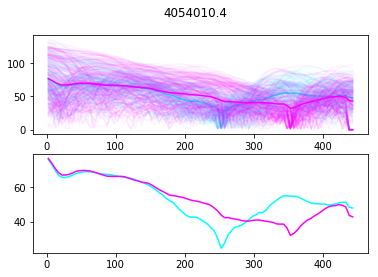

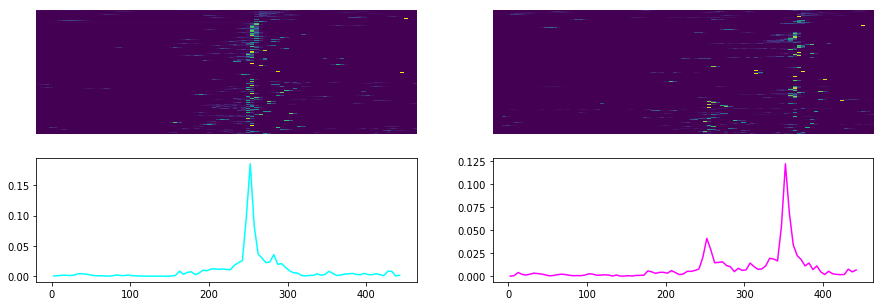

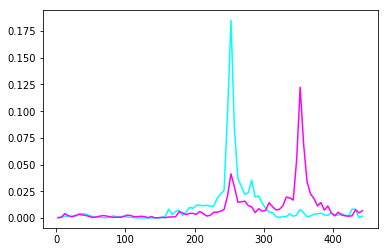

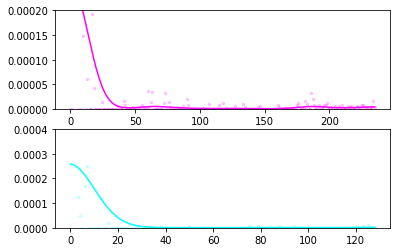

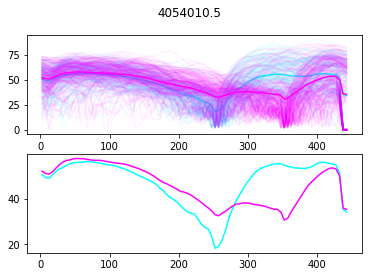

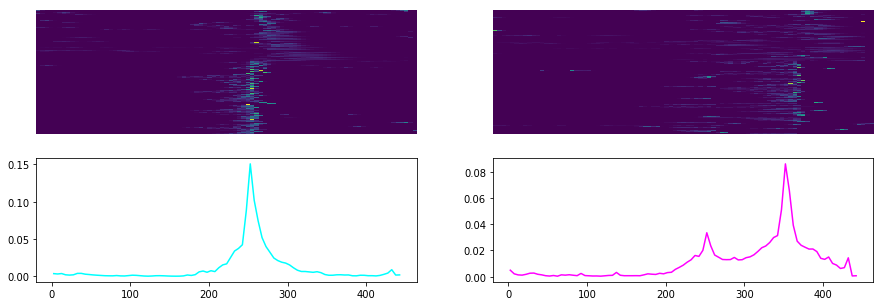

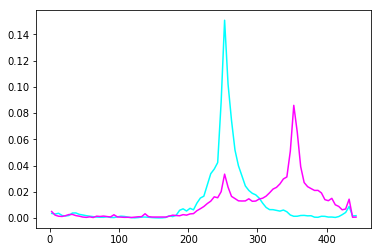

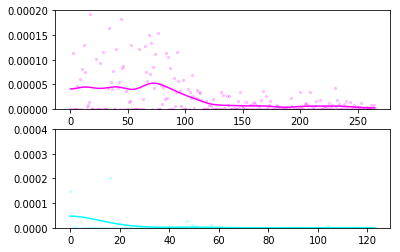

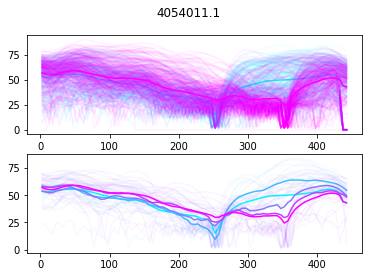

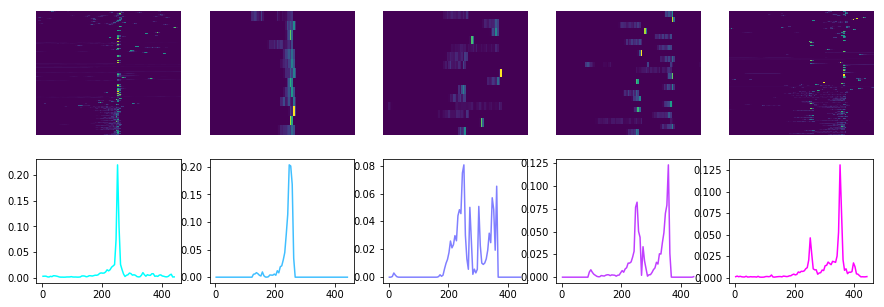

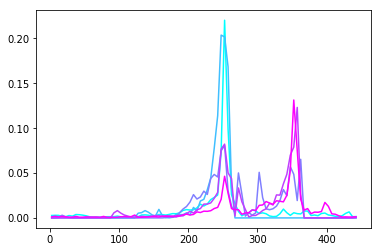

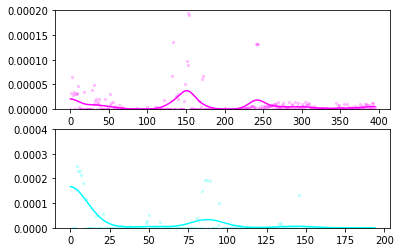

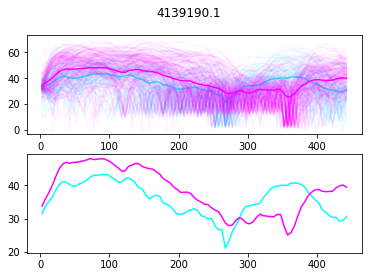

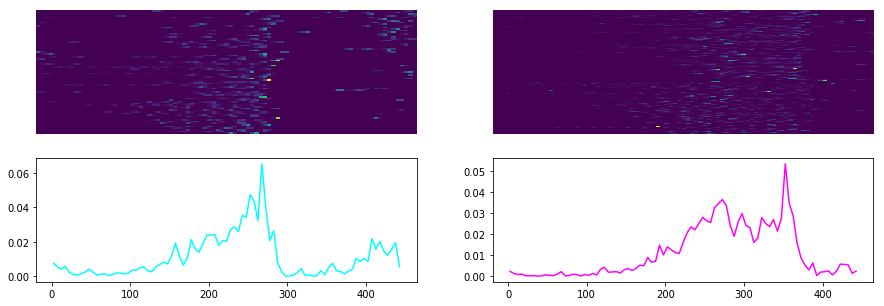

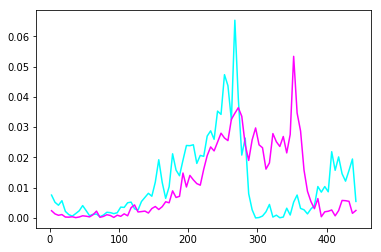

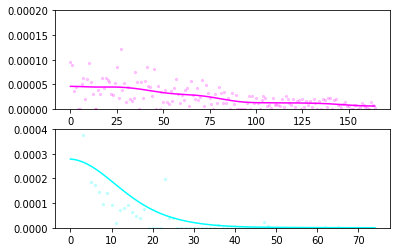

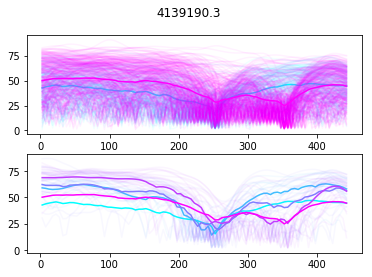

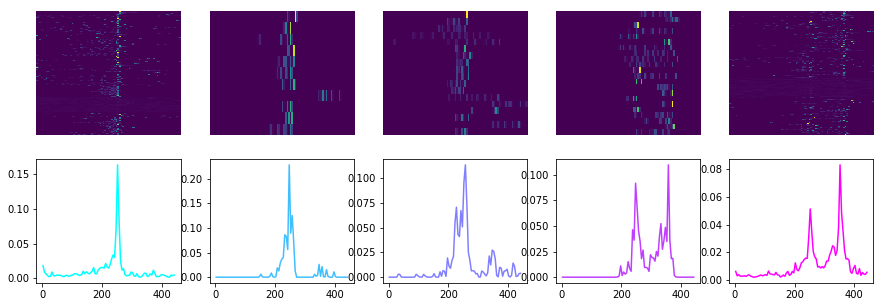

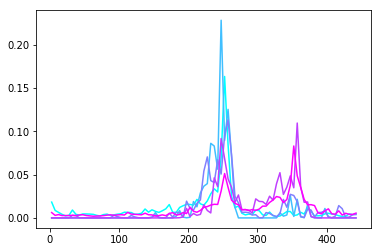

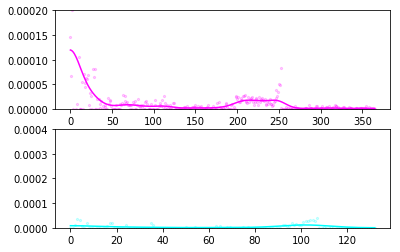

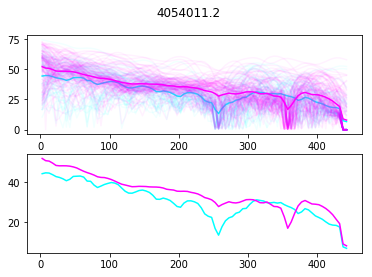

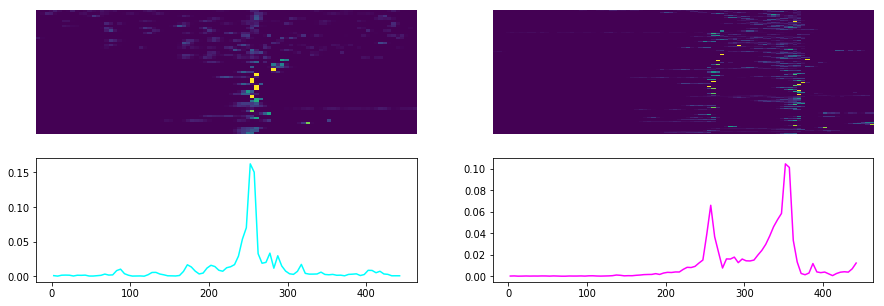

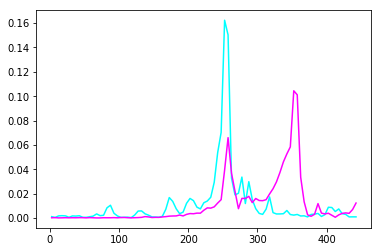

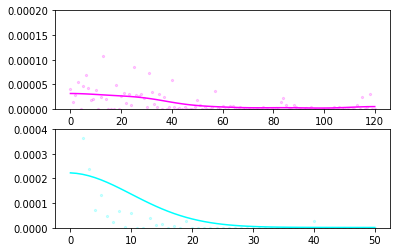

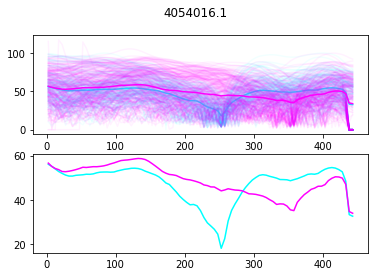

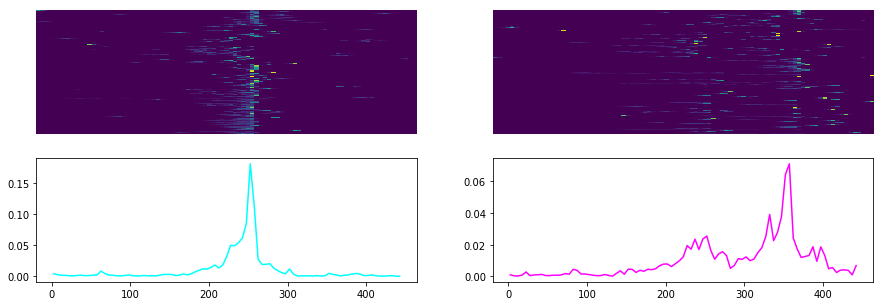

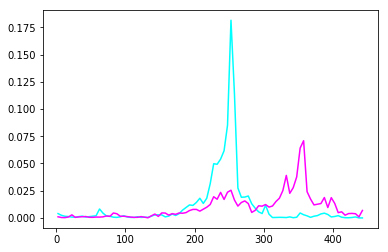

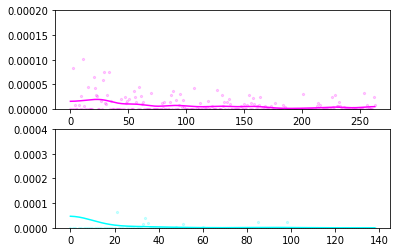

In [71]:
for mouse in dataDict.keys():
    print(mouse)
    sessions = []
    for s in dataDict[mouse]['noTimeout']:
        if isinstance(s,list):
            for ss in s:
                sessions.append('1PortTower_noTimeout_'+ss +'_')
        else:
            sessions.append('1PortTower_noTimeout_'+s +'_')
        
    c = b.process_data(mouse,sessions)
    
    gridData, (rewardedTrials, errorTrials, omissionTrials, morphList) = c._interpolate_data()
    rewardedTrialMask, errorTrialMask, omissionTrialMask = np.zeros([len(morphList),],dtype=bool), np.zeros([len(morphList),],dtype=bool), np.zeros([len(morphList),],dtype=bool)
    rewardedTrialMask[rewardedTrials], errorTrialMask[errorTrials], omissionTrialMask[omissionTrials] = True, True, True
    morph = np.array(morphList)
    
    
    trial_matrices, bin_edges, bin_centers = c.make_trial_matrices(gridData)
    
    
    f, ax = plt.subplots(2,1)
    f.suptitle(mouse)
    for i,m in enumerate(np.unique(morph)):
        if m in [0.,1.]:
            tmp = ax[0].plot(bin_centers,trial_matrices['speed'][(morphList==m) ,:].transpose(),alpha=.05,color=plt.cm.cool(m))
            tmp = ax[0].plot(bin_centers,np.nanmean(trial_matrices['speed'][(morphList==m) ,:],axis=0),color=plt.cm.cool(m))
            tmp = ax[1].plot(bin_centers,np.nanmean(trial_matrices['speed'][(morphList==m) ,:],axis=0),color=plt.cm.cool(m))

        else:
            tmp = ax[1].plot(bin_centers,trial_matrices['speed'][morph==m,:].transpose(),alpha=.05,color=plt.cm.cool(m))
            tmp = ax[1].plot(bin_centers,np.nanmean(trial_matrices['speed'][morph==m,:],axis=0),color=plt.cm.cool(m))
        
        # rasters!!!!!
    uniqueMorph = np.unique(morph)
    f, ax = plt.subplots(2,uniqueMorph.shape[0],figsize=[15,5])
    ff, aax = plt.subplots()
    #f.figsize
    for i,m in enumerate(uniqueMorph):
        print(m)

        trialMat = trial_matrices['lick rate'][morphList==m,:]
        for row in range(trialMat.shape[0]):
            if trialMat[row,:].sum() > 0:
                trialMat[row,:] = trialMat[row,:]/trialMat[row,:].sum()
            else:
                trialMat[row,:] = 0.          
        #print(trialMat)
        ax[0,i].imshow(trialMat,aspect='auto') #,cmap='magma')
        ax[0,i].axis('off')
        ax[1,i].plot(bin_centers,trialMat.mean(axis=0),color=plt.cm.cool(m))

        aax.plot(bin_centers,trialMat.mean(axis=0),color=plt.cm.cool(m))
        
        
    f, ax = plt.subplots(2,1)
    for i,m in enumerate(np.unique(morph)):
        trialMat = trial_matrices['lick rate'][(morphList==m) ,1:]
        zone1_licks = trialMat[:,50:63].mean(axis=1)
        zone2_licks = trialMat[:,70:83].mean(axis=1)
        if m==1:
            ax[0].scatter(np.arange(0,trialMat.shape[0]),zone1_licks,s=5,color=plt.cm.cool(m),alpha=.2)
            ax[0].plot(gaussian_filter(zone1_licks,10),color=plt.cm.cool(m))
            ax[0].set_ylim(0,2e-4)
        if m==0:
            ax[1].scatter(np.arange(0,trialMat.shape[0]),zone2_licks,s=5,color=plt.cm.cool(m),alpha=.2)
            ax[1].plot(gaussian_filter(zone2_licks,10),color=plt.cm.cool(m))
            ax[1].set_ylim(0,4e-4)


4054010.5
1PortTower_Timeout_1_imaging_


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars


1PortTower_Timeout_2_imaging_
['1PortTower_Timeout_3_', '1PortTower_Timeout_3_1_']
1PortTower_Timeout_4_imaging_


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice


4054011.1
1PortTower_Timeout_1_
['1PortTower_Timeout_2_imaging_', '1PortTower_Timeout_2_postimaging_']
1PortTower_Timeout_3_
1PortTower_Timeout_4_imaging_
4139190.1
1PortTower_Timeout_2_
['1PortTower_Timeout_4_', '1PortTower_Timeout_4_1_']
1PortTower_Timeout_5_1_imaging_
1PortTower_Timeout_6_
['1PortTower_Timeout_7_', '1PortTower_Timeout_7_imaging_', '1PortTower_Timeout_7_imaging2_']
4139190.3
1PortTower_Timeout_1_
1PortTower_Timeout_2_imaging_
1PortTower_Timeout_3_
1PortTower_Timeout_4_imaging_
4054011.2
1PortTower_Timeout_1_
1PortTower_Timeout_2_
1PortTower_Timeout_3_
1PortTower_Timeout_4_
1PortTower_Timeout_5_
4054016.1
1PortTower_Timeout_1_
['1PortTower_Timeout_2_', '1PortTower_Timeout_2_1_']
['1PortTower_Timeout_3_', '1PortTower_Timeout_3_1_']
1PortTower_Timeout_4_
1PortTower_Timeout_5_
1PortTower_Timeout_6_


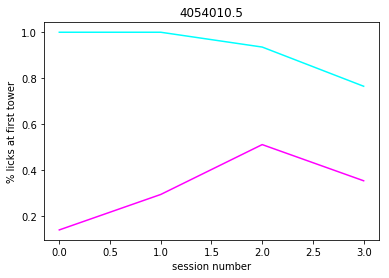

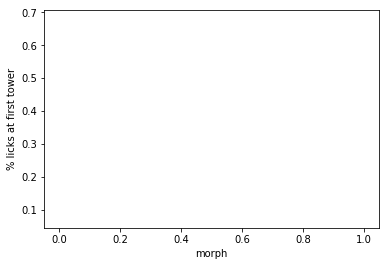

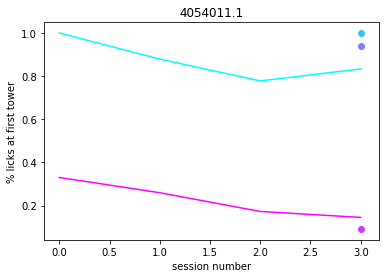

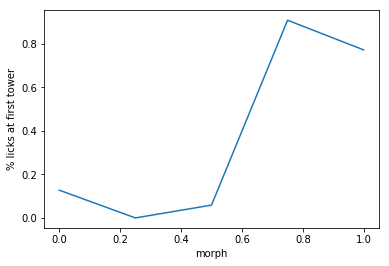

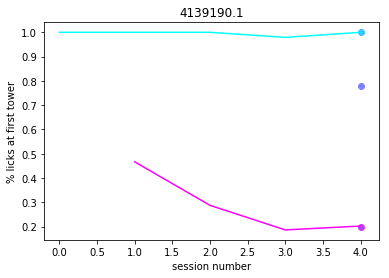

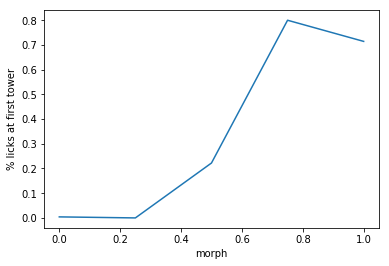

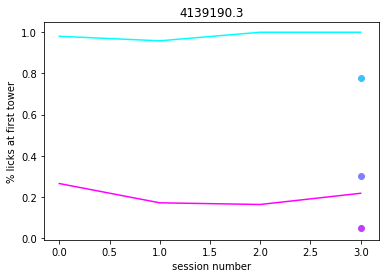

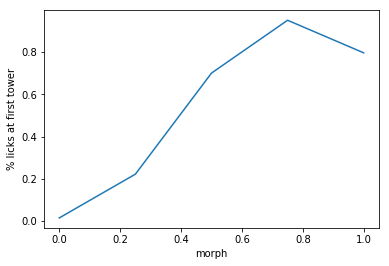

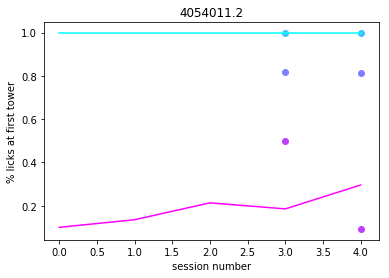

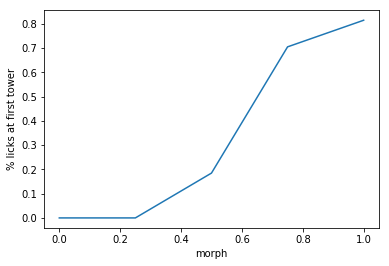

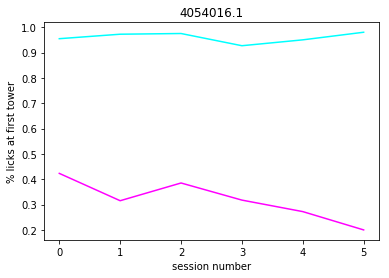

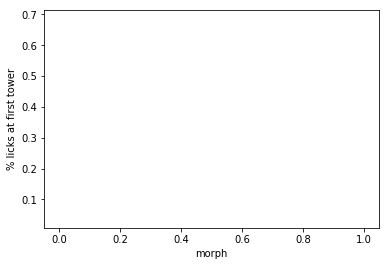

In [141]:
#
for mouse in dataDict.keys():
    if mouse not in ['4054010.4']:
        print(mouse)
        pcntCorr=np.zeros([5,len(dataDict[mouse]['Timeout'])])
        pcntCorr[:]=np.nan
        #for key in [0, .25, .5, .75, 1.0]:
        #    pcntCorr[key] = np.zeros([len(dataDict[mouse]['Timeout']),])
        #    pcntCorr[key][:] = np.nan
        
        for i, s in enumerate(dataDict[mouse]['Timeout']): 

            if isinstance(s,list):
                sessions = []
                for ss in s:
                    sessions.append('1PortTower_Timeout_'+ss +'_')
            else:
                sessions = '1PortTower_Timeout_'+s +'_'
            print(sessions)
            c = b.process_data(mouse,sessions)

            gridData, (rewardedTrials, errorTrials, omissionTrials, morphList) = c._interpolate_data()
            rewardedTrialMask, errorTrialMask, omissionTrialMask = np.zeros([len(morphList),],dtype=bool), np.zeros([len(morphList),],dtype=bool), np.zeros([len(morphList),],dtype=bool)
            rewardedTrialMask[rewardedTrials], errorTrialMask[errorTrials], omissionTrialMask[omissionTrials] = True, True, True
            morph = np.array(morphList)
            trial_matrices, bin_edges, bin_centers = c.make_trial_matrices(gridData)
            bin_edges = np.array(bin_edges)
            #['1','2_imaging','3','4_imaging']
            for j,m in enumerate([0, .25, .5, .75, 1.0]):
                if m < .5:
                    pcntCorr[j,i]=np.sum(rewardedTrialMask & (morph==m))/sum(morph==m)
                
                elif m> .5:
                    pcntCorr[j,i]=1-np.sum(rewardedTrialMask & (morph==m))/sum(morph==m)
                else:
                    tmat = trial_matrices['licks'][morph==m,:]
                    rewardZoneInds = np.where((bin_edges>=250) & (bin_edges<=320))[0]
                    pcntCorr[j,i]=sum(tmat[:,rewardZoneInds].sum(axis=1)>0)/sum(morph==m)


           

            # percent correct
        f, ax = plt.subplots()
        for k, mm in enumerate([0., .25, .5, .75, 1]):
            if mm in [0.,1.]:
                #print(mm)
                ax.plot(np.arange(pcntCorr.shape[1]),pcntCorr[k,:],color=plt.cm.cool(np.float(mm)))
            else: 
                #print(mm)
                ax.scatter(np.arange(pcntCorr.shape[1]),pcntCorr[k,:],color=plt.cm.cool(np.float(mm))[:-1])
                 
        ax.set_title(mouse)
        ax.set_ylabel('% licks at first tower')
        ax.set_xlabel('session number')
        
        f,ax= plt.subplots()
        ax.plot(np.array([0., .25, .5, .75, 1]),1-np.nanmean(pcntCorr,axis=1))
        ax.set_ylabel('% licks at first tower')
        ax.set_xlabel('morph')
        
        # if  number of unique morphs is > 2
        
        # calculate percent of trials licking in tower 1 reward zone and tower 2 reward zone
        
    # plot percent correct vs session number by morph

4054010.5
0.0
1.0
4054011.1
0.0
0.25
0.5
0.75
1.0
4139190.1
0.0
0.25
0.5
0.75
1.0
4139190.3
0.0
0.25
0.5
0.75
1.0
4054011.2
0.0
0.25
0.5
0.75
1.0
4054016.1


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.0
1.0


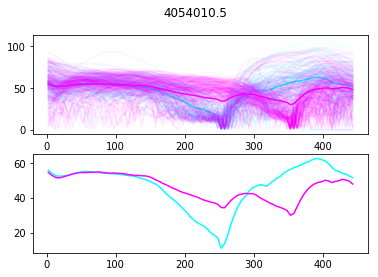

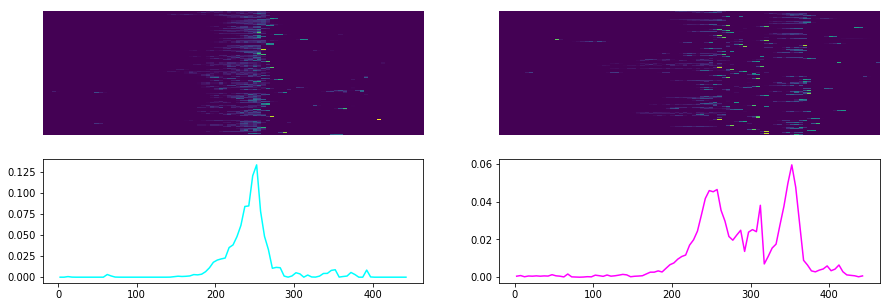

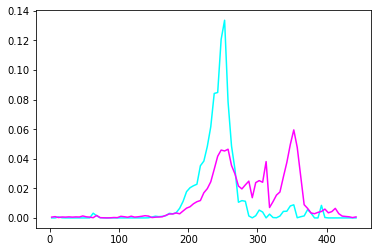

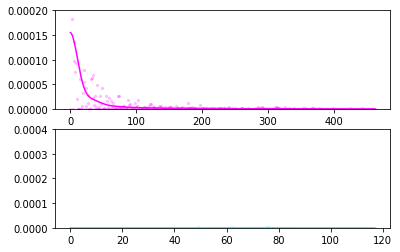

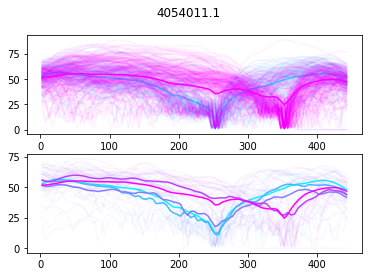

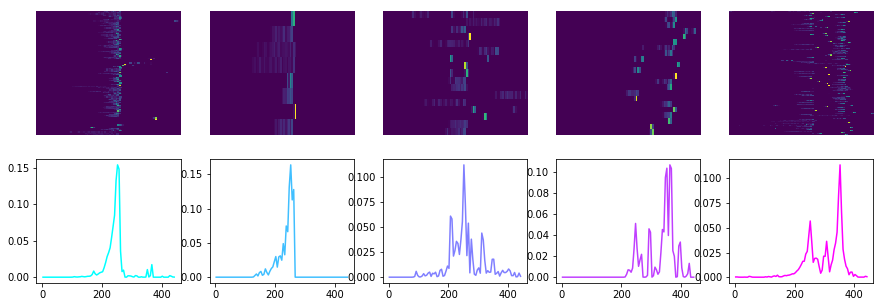

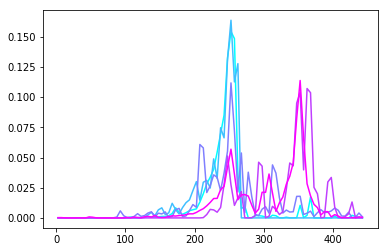

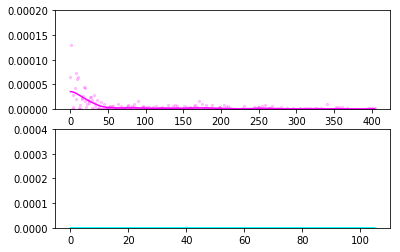

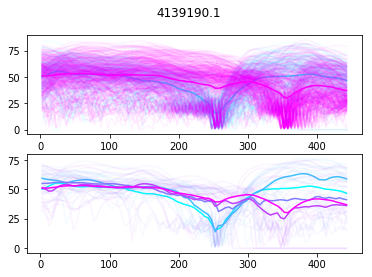

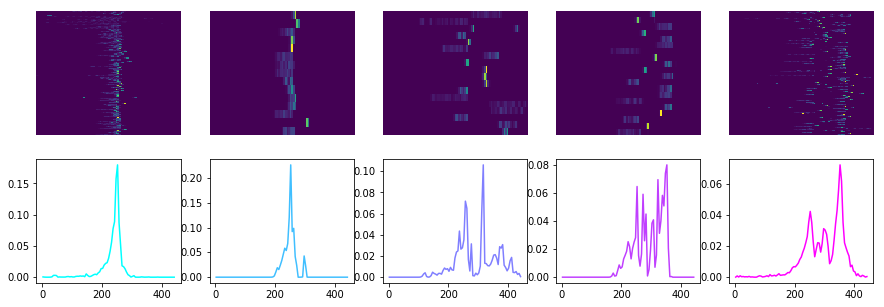

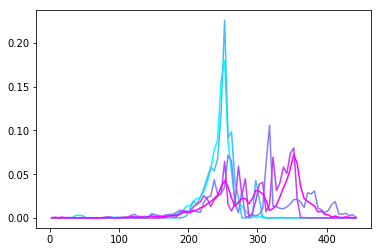

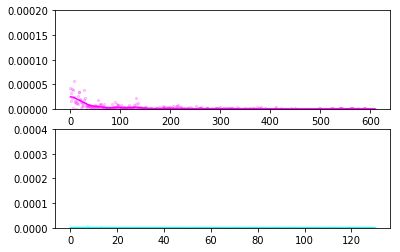

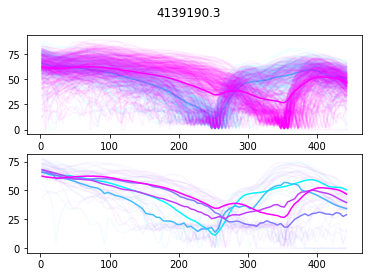

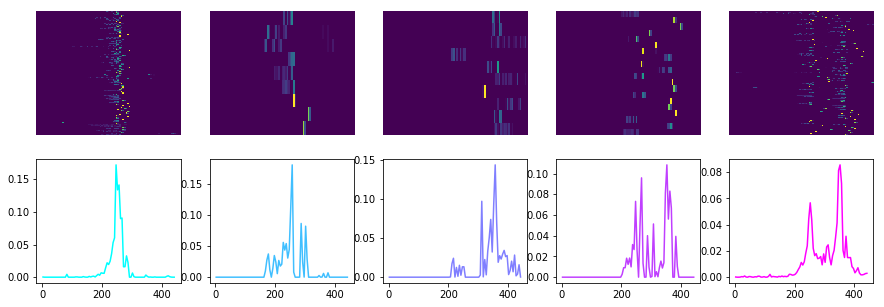

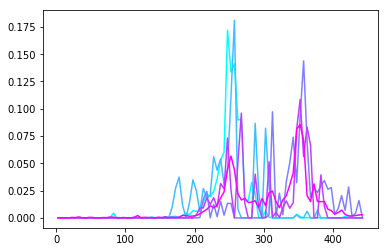

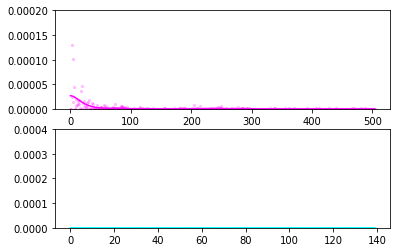

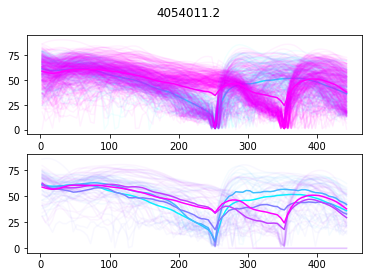

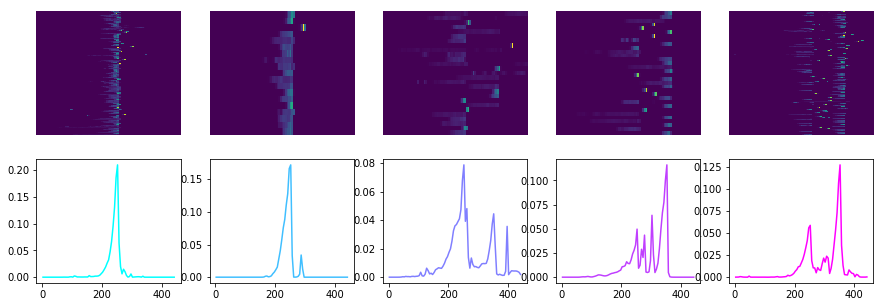

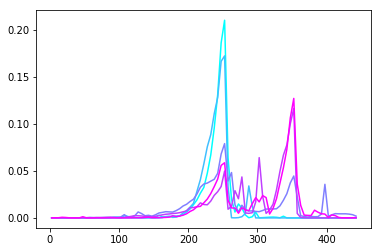

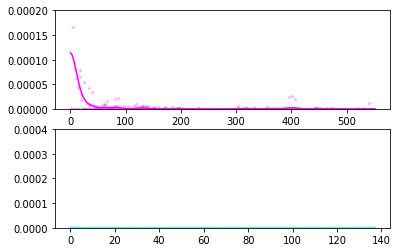

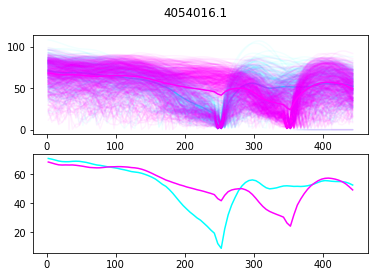

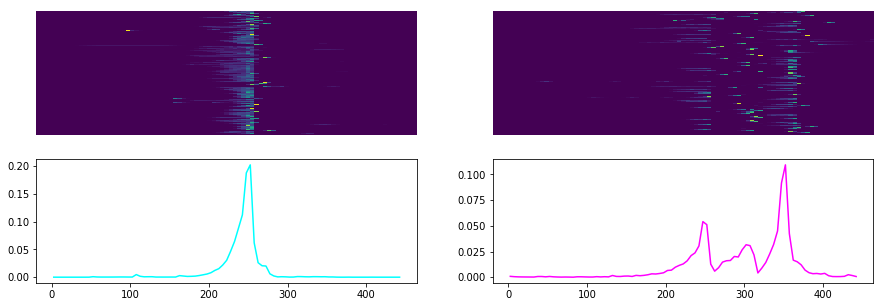

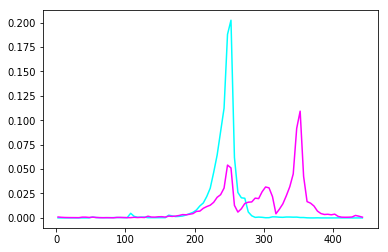

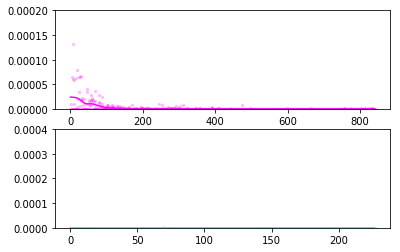

In [145]:
for mouse in dataDict.keys():
    if mouse not in ['4054010.4']:
        print(mouse)
        sessions = []
        for s in dataDict[mouse]['Timeout']:
            if isinstance(s,list):
                for ss in s:
                    sessions.append('1PortTower_Timeout_'+ss +'_')
            else:
                sessions.append('1PortTower_Timeout_'+s +'_')

        c = b.process_data(mouse,sessions)

        gridData, (rewardedTrials, errorTrials, omissionTrials, morphList) = c._interpolate_data()
        rewardedTrialMask, errorTrialMask, omissionTrialMask = np.zeros([len(morphList),],dtype=bool), np.zeros([len(morphList),],dtype=bool), np.zeros([len(morphList),],dtype=bool)
        rewardedTrialMask[rewardedTrials], errorTrialMask[errorTrials], omissionTrialMask[omissionTrials] = True, True, True
        morph = np.array(morphList)


        trial_matrices, bin_edges, bin_centers = c.make_trial_matrices(gridData)


        f, ax = plt.subplots(2,1)
        f.suptitle(mouse)
        for i,m in enumerate(np.unique(morph)):
            if m in [0.,1.]:
                tmp = ax[0].plot(bin_centers,trial_matrices['speed'][(morphList==m) & rewardedTrialMask,:].transpose(),alpha=.05,color=plt.cm.cool(m))
                tmp = ax[0].plot(bin_centers,np.nanmean(trial_matrices['speed'][(morphList==m) & rewardedTrialMask ,:],axis=0),color=plt.cm.cool(m))
                tmp = ax[1].plot(bin_centers,np.nanmean(trial_matrices['speed'][(morphList==m) & rewardedTrialMask,:],axis=0),color=plt.cm.cool(m))

            else:
                tmp = ax[1].plot(bin_centers,trial_matrices['speed'][morph==m,:].transpose(),alpha=.05,color=plt.cm.cool(m))
                tmp = ax[1].plot(bin_centers,np.nanmean(trial_matrices['speed'][morph==m,:],axis=0),color=plt.cm.cool(m))

            # rasters!!!!!
        uniqueMorph = np.unique(morph)
        f, ax = plt.subplots(2,uniqueMorph.shape[0],figsize=[15,5])
        ff, aax = plt.subplots()
        #f.figsize
        for i,m in enumerate(uniqueMorph):
            print(m)

            trialMat = trial_matrices['lick rate'][morphList==m,:]
            for row in range(trialMat.shape[0]):
                if trialMat[row,:].sum() > 0:
                    trialMat[row,:] = trialMat[row,:]/trialMat[row,:].sum()
                else:
                    trialMat[row,:] = 0.          
            #print(trialMat)
            ax[0,i].imshow(trialMat,aspect='auto') #,cmap='magma')
            ax[0,i].axis('off')
            ax[1,i].plot(bin_centers,trialMat.mean(axis=0),color=plt.cm.cool(m))

            aax.plot(bin_centers,trialMat.mean(axis=0),color=plt.cm.cool(m))


        f, ax = plt.subplots(2,1)
        for i,m in enumerate(np.unique(morph)):
            trialMat = trial_matrices['lick rate'][(morphList==m) ,1:]
            zone1_licks = trialMat[:,50:63].mean(axis=1)
            zone2_licks = trialMat[:,70:83].mean(axis=1)
            if m==1:
                ax[0].scatter(np.arange(0,trialMat.shape[0]),zone1_licks,s=5,color=plt.cm.cool(m),alpha=.2)
                ax[0].plot(gaussian_filter(zone1_licks,10),color=plt.cm.cool(m))
                ax[0].set_ylim(0,2e-4)
            if m==0:
                ax[1].scatter(np.arange(0,trialMat.shape[0]),zone2_licks,s=5,color=plt.cm.cool(m),alpha=.2)
                ax[1].plot(gaussian_filter(zone2_licks,10),color=plt.cm.cool(m))
                ax[1].set_ylim(0,4e-4)